# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [6]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list

# Loop through the scraped data to create a list of rows
ids = []
terrestrial_dates = []
sols = []
ls = []
month = []
min_temp = []
pressure = []
data = []

for row in rows[1:]:  # Skip the header row (index 0)
    columns = row.find_all('td')
    row_data = {
        'id': columns[0].text.strip(),
        'terrestrial_date': columns[1].text.strip(),
        'sol': int(columns[2].text.strip()),
        'ls': float(columns[3].text.strip()),
        'month': int(columns[4].text.strip()),
        'min_temp': float(columns[5].text.strip()),
        'pressure': float(columns[6].text.strip())
    }
    data.append(row_data)

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create a DataFrame from the list of dictionaries
mars_weather_df = pd.DataFrame(data)


In [11]:
# Confirm DataFrame was created successfully
# Print the DataFrame
print(mars_weather_df)

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1862  1889       2018-02-23  1973  133.0      5     -78.0     730.0
1863  1892       2018-02-24  1974  134.0      5     -77.0     729.0
1864  1894       2018-02-25  1975  134.0      5     -76.0     729.0
1865  1893       2018-02-26  1976  135.0      5     -77.0     728.0
1866  1895       2018-02-27  1977  135.0      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
# Print the data type of each column
print(mars_weather_df.dtypes)


id                   object
terrestrial_date     object
sol                   int64
ls                  float64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [13]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime type
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert 'sol' and 'month' to int type
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

# Convert 'ls', 'min_temp', and 'pressure' to float type
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

# Print the data type of each column after conversion
print(mars_weather_df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [11]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
# Find the number of months on Mars
num_months = mars_weather_df['month'].nunique()

# Print the result
print("Number of months on Mars:", num_months)


Number of months on Mars: 12


In [15]:
# 2. How many Martian days' worth of data are there?
# Find the number of Martian days' worth of data
num_martian_days = mars_weather_df['sol'].nunique()

# Print the result
print("Number of Martian days' worth of data:", num_martian_days)


Number of Martian days' worth of data: 1867


In [16]:
# 3. What is the average low temperature by month?
# Calculate the average low temperature (minimum temperature) by month
average_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Print the result
print("Average Low Temperature by Month:")
print(average_min_temp_by_month)


Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


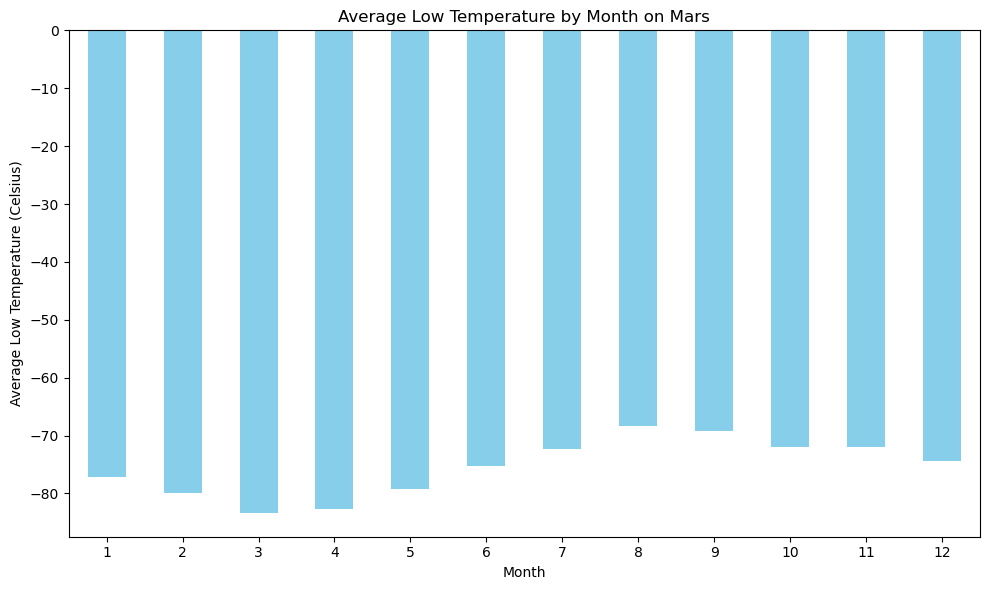

In [17]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
# Identify the coldest and hottest months in Curiosity's location
# Find the coldest and hottest months
coldest_month = average_min_temp_by_month.idxmin()
hottest_month = average_min_temp_by_month.idxmax()

# Print the result
print("Coldest Month at Curiosity's Location:", coldest_month)
print("Hottest Month at Curiosity's Location:", hottest_month)


Coldest Month at Curiosity's Location: 3
Hottest Month at Curiosity's Location: 8


In [19]:
# 4. Average pressure by Martian month
# Calculate the average pressure by Martian month
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Print the result
print("Average Pressure by Martian Month:")
print(average_pressure_by_month)


Average Pressure by Martian Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


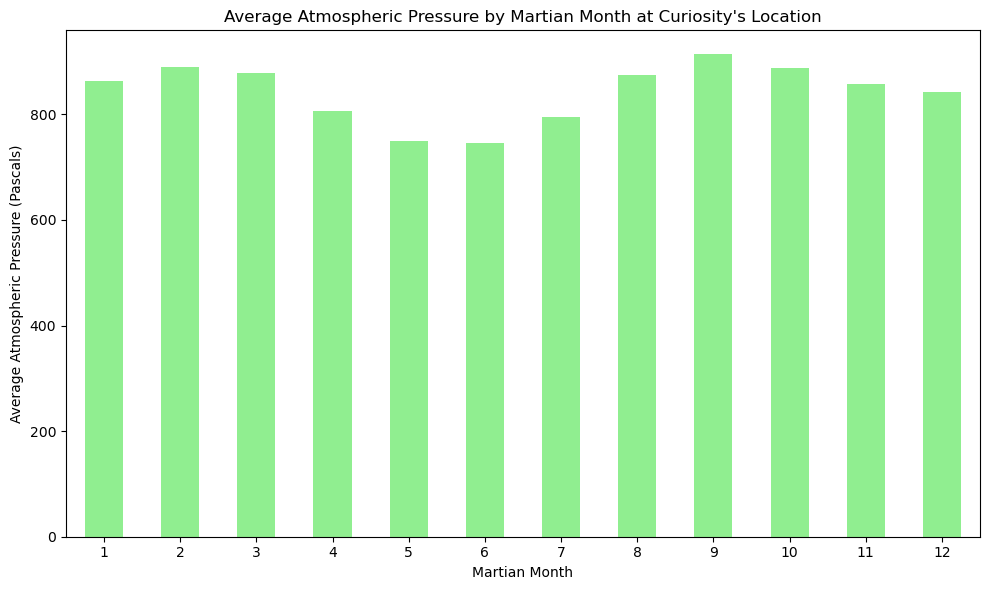

In [20]:
# Plot the average pressure by month
import matplotlib.pyplot as plt

# Plot the average pressure by Martian month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average Atmospheric Pressure by Martian Month at Curiosity\'s Location')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pascals)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Number of Terrestrial (Earth) Days in a Martian Year: 1.8809034907597535


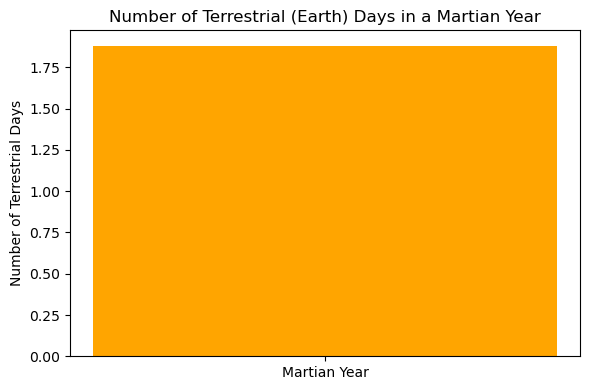

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Calculate the number of terrestrial (Earth) days in a Martian year
martian_year_days = 687
earth_year_days = 365.25
terrestrial_days_in_martian_year = martian_year_days / earth_year_days

# Print the result
print("Number of Terrestrial (Earth) Days in a Martian Year:", terrestrial_days_in_martian_year)

# Plot the result
plt.figure(figsize=(6, 4))
plt.bar(['Martian Year'], [terrestrial_days_in_martian_year], color='orange')
plt.title('Number of Terrestrial (Earth) Days in a Martian Year')
plt.ylabel('Number of Terrestrial Days')
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:

# Write the data to a CSV file
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [21]:
browser.quit()